In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


# Chapter 2 Lab: Introduction to R (now in Python!)
 Please note that, the purpose of this file is *not* to demonstrate Python's basic functionalities (there are much more comprehensive guides, [like this](https://learnxinyminutes.com/docs/python3/)) but to mirror ISLR's lab in R as much as possible.
## Basic Commands

In [46]:
x = [1, 3, 2, 5]
print(x)
y = [1, 4, 3]
print(y)


[1, 3, 2, 5]
[1, 4, 3]


### Get the length of a variable

In [47]:
print(len(x))
print(len(y))


4
3


### Element-wise addition of two lists
#### Pure Python
 Use [map](https://docs.python.org/2/library/functions.html#map) with [operator.add](https://docs.python.org/2/library/operator.html#operator.add) ([source](https://stackoverflow.com/a/18713494/4173146)):

In [48]:
from operator import add
x = [1, 6, 2]
print(list(map(add, x, y)))


[2, 10, 5]


 or [zip](https://docs.python.org/2/library/functions.html#zip) with a list comprehension:

In [49]:
print([sum(i) for i in zip(x, y)])


[2, 10, 5]


#### Using NumPy (will be faster than pure Python) ([source](https://stackoverflow.com/a/18713494/4173146)):

In [50]:
import numpy as np
x2 = np.array([1, 6, 2])
y2 = np.array([1, 4, 3])
print(x2 + y2)


[ 2 10  5]


### List all the variables

In [51]:
def printvars():
   tmp = globals().copy()
   [print(k,'  :  ',v,' type:' , type(v)) for k,v in tmp.items() if not k.startswith('_') and k!='tmp' and k!='In' and k!='Out' and not hasattr(v, '__call__')]
printvars()


matplotlib   :   <module 'matplotlib' from 'C:\\Users\\a_izadeh\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>  type: <class 'module'>
sys   :   <module 'sys' (built-in)>  type: <class 'module'>
notebook   :   <module 'notebook' from 'C:\\Users\\a_izadeh\\Anaconda3\\lib\\site-packages\\notebook\\__init__.py'>  type: <class 'module'>
np   :   <module 'numpy' from 'C:\\Users\\a_izadeh\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>  type: <class 'module'>
A   :   [[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]]  type: <class 'numpy.ndarray'>
b   :   [[ True  True False  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]  type: <class 'numpy.ndarray'>
mask   :   [False  True False  True]  type: <class 'numpy.ndarray'>
x   :   [1, 6, 2]  type: <class 'list'>
y   :   [1, 4, 3]  type: <class 'list'>
x2   :   [1 6 2]  type: <class 'numpy.ndarray'>
y2   :   [1 4 3]  type: <class 'numpy.ndarray'>


### Clear a variable's content

In [52]:
x = None
print(x)

None


### Delete a variable (its reference)

In [53]:
del y
print(y)

NameError: name 'y' is not defined

### Delete all varialbes ([source](https://stackoverflow.com/a/53415612/4173146))

In [54]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

for name in dir():
    if not name.startswith('_'):
        del locals()[name]
print(x2)
print(y2)

NameError: name 'x2' is not defined

 or simply restart the interpreter.

### Declare matrices ([source](https://stackoverflow.com/questions/6667201/how-to-define-a-two-dimensional-array-in-python))
#### Pure Python

In [55]:
rowCount = 4
colCount = 3
mat = [[0 for x in range(colCount)] for x in range(rowCount)]
print(mat)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


 or a shorter version:

In [56]:
mat = [[0] * colCount for i in range(rowCount)]
print(mat)


[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


 However, it is best to use numpy arrays to represent matrices.

In [57]:
import numpy
mat = numpy.zeros((rowCount, colCount))
print(mat)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### The sqaure root of each element of a vector or matrix (numpy array)

In [58]:
import numpy as np
mat = [[16] * colCount for i in range(rowCount)]
mat = np.asarray(mat)
print(np.sqrt(mat))


[[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]


### Generate a vector of random normal variables
 Dimensions are provided as arguements to the numpy function.

 For random samples from a Normal distribution with mean *mu* and standard deviation *sigma*, use:
 `sigma * np.random.randn(...) + mu` according to the [documentation](https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.randn.html#numpy.random.randn)

In [59]:
import numpy as np
x = np.random.randn(50)
y = x + ( 0.1 * np.random.randn(50) + 50 )

 To compute the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), or simply correlation, between the two vectors:

In [60]:
print(np.corrcoef(x, y))


[[1.         0.99395962]
 [0.99395962 1.        ]]


 To set the seed for random number generation, in Python:

In [61]:
import random
random.seed(0)

 Or in numpy:

In [62]:
np.random.seed(0)
x = np.random.randn(50)
y = x + ( 0.1 * np.random.randn(50) + 50 )


### To compute the mean, variance, and standard deviation of a vector of numbers:

In [63]:
print(np.mean(x))
print(np.var(x))
print(np.std(x))
print(np.mean(y))
print(np.var(y))
print(np.std(y))


0.14055927231309787
1.2668018446943103
1.125522920554846
50.138464948188684
1.262768994078827
1.1237299471309052


## Graphics
### Using matplotlib

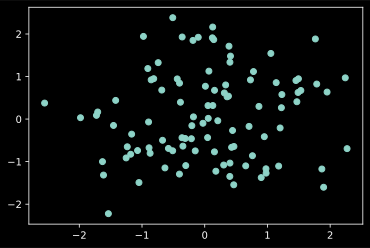

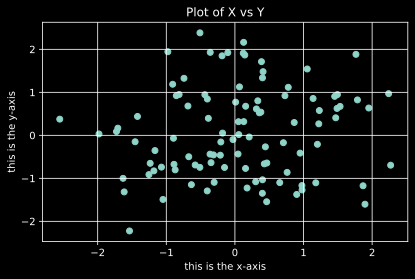

In [64]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

fig, ax = plt.subplots()
ax.set_xlabel(r'this is the x-axis')
ax.set_ylabel(r'this is the y-axis')
ax.set_title('Plot of X vs Y')
ax.grid(True)
fig.tight_layout()
ax.scatter(x, y)

#### Save the plot to a file

In [65]:
fig.savefig('sample.png')
# remove the whitespace around the image
fig.savefig('sample.pdf', bbox_inches='tight')


### Using Seaborn

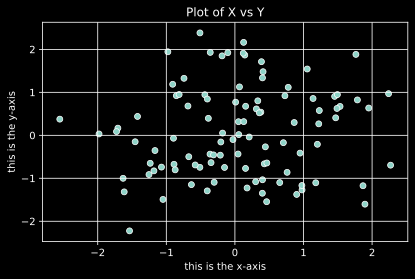

In [66]:
import seaborn as sns
fig, ax = plt.subplots()
ax.set_xlabel(r'this is the x-axis')
ax.set_ylabel(r'this is the y-axis')
ax.set_title('Plot of X vs Y')
ax.grid(True)
fig.tight_layout()
sns.scatterplot(x, y)


### Using Plotly

In [67]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))
fig.show()


### Using Bokeh

In [68]:
from bokeh.plotting import figure as bkfig, show as bkshow
fig = bkfig(title="Plot of X vs Y", tools='pan,wheel_zoom,box_zoom,reset,hover,crosshair', active_inspect='hover')
fig.circle(x=x, y=y)
fig.xaxis.axis_label = 'this is the x-axis'
fig.yaxis.axis_label = 'this is the y-axis'
bkshow(fig)


### Generating a sequence or range of numbers
 In pure Python, use `range(lower, upper, step)`:
 The following will generate a sequence of integers 1,...,10

In [69]:
x = range(1, 11)
for i in x:
        print(i)

1
2
3
4
5
6
7
8
9
10


 To use non-decimal steps, or specify the number of elements to return, use the `linspace()` function in NumPy:

In [70]:
x = np.linspace(1, 10, 20)
print(x)
# Note that the PI constant in all of Python's math module, NumPy, and SciPy are the same.
x = np.linspace(-np.pi, np.pi, 50)
print(x)


[ 1.          1.47368421  1.94736842  2.42105263  2.89473684  3.36842105
  3.84210526  4.31578947  4.78947368  5.26315789  5.73684211  6.21052632
  6.68421053  7.15789474  7.63157895  8.10526316  8.57894737  9.05263158
  9.52631579 10.        ]
[-3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.5004513
 -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
 -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
 -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
 -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
  2.24399475  2.37222302  2.5004513   2.62867957  2.75690784  2.88513611
  3.01336438  3.14159265]


### Contour plotting

<a list of 28 text.Text objects>

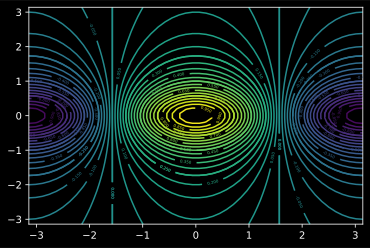

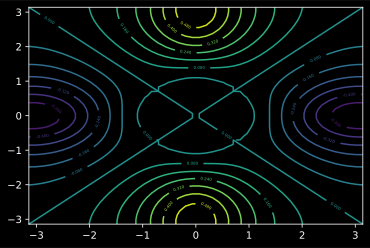

In [71]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


x = np.linspace(-np.pi, np.pi, 50)
y = x
X, Y = np.meshgrid(x, y)
# [source](https://stackoverflow.com/a/45496154/4173146)
Z = np.cos(y) / (1 + x[:, None]**2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=4)

CS = ax.contour(X, Y, Z, 45)
ax.clabel(CS, inline=1, fontsize=4)

Z2 = ( Z - Z.T ) / 2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z2, 15)
ax.clabel(CS, inline=1, fontsize=4)


### Filled contour (heatmap)
 Note: run the previous cell first.

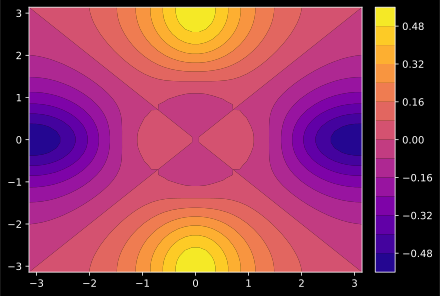

In [72]:
fig, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(X, Y, Z2, 15, cmap=plt.cm.plasma)
cbar = fig.colorbar(CS)


### 3D contour plots
 3D wireframe plot

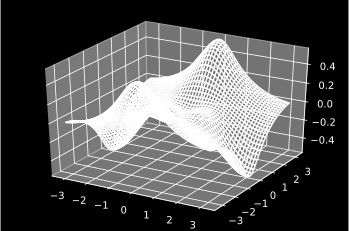

In [73]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z2)
plt.show()


 3D surface (color map)

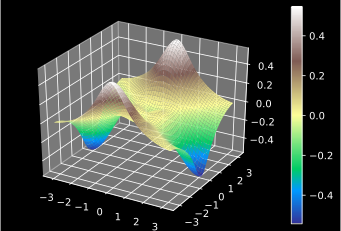

In [74]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z2, cmap=cm.terrain)
fig.colorbar(surf)
plt.show()


 Project filled contour 'profiles' onto the 'walls' of the graph

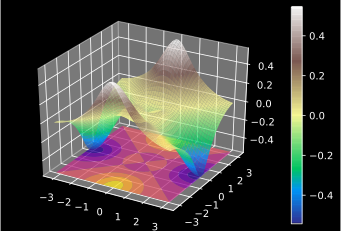

In [75]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z2, cmap=cm.terrain, alpha=0.8)
fig.colorbar(surf)
# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph (from the [matplotlib documentation](https://matplotlib.org/3.1.1/gallery/mplot3d/contourf3d_2.html#sphx-glr-gallery-mplot3d-contourf3d-2-py))
cset = ax.contourf(X, Y, Z2, zdir='z', offset=ax.get_zlim()[0], cmap=cm.plasma, alpha=0.8)
# cset = ax.contourf(X, Y, Z2, zdir='x', offset=ax.get_xlim()[0], cmap=cm.plasma, alpha=0.8)
# cset = ax.contourf(X, Y, Z2, zdir='y', offset=ax.get_ylim()[1], cmap=cm.plasma, alpha=0.8)
plt.show()


 Vary the viewing angle

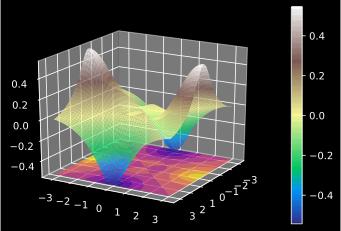

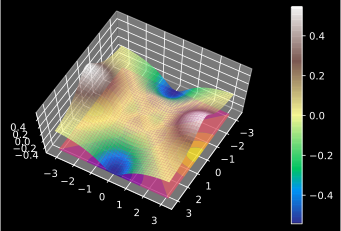

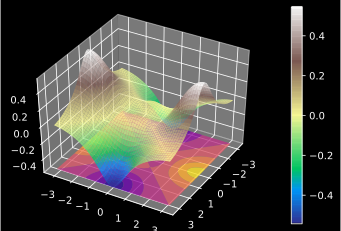

In [76]:
for elev in [20, 70, 40]:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(X, Y, Z2, cmap=cm.terrain, alpha=0.8)
        fig.colorbar(surf)
        cset = ax.contourf(X, Y, Z2, zdir='z', offset=ax.get_zlim()[0], cmap=cm.plasma, alpha=0.8)
        ax.azim = 30
        ax.elev = elev

        plt.show()


## Indexing Data

In [77]:
import numpy as np
A = np.array(np.arange(1, 17, 1)).reshape(4, 4).T
print(A)
# Python's arrays are zero-indexed
print(A[1, 2])

[[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]]
10


### Select multiple rows and columns

In [78]:
print(np.array([A[0,1], A[0,3], A[2,1], A[2,3]]).reshape(2,2))
print(A[:3, 1:4])
print(A[:2, :])
print(A[:, :2])
print(A[0])

[[ 5 13]
 [ 7 15]]
[[ 5  9 13]
 [ 6 10 14]
 [ 7 11 15]]
[[ 1  5  9 13]
 [ 2  6 10 14]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
[ 1  5  9 13]


### Keep all rows or columns except those indicated in the index
 To exclude whole rows or columns, use a boolean mask.

In [79]:
mask = np.ones(len(A), dtype=bool)
# Set the excluded indices to False
mask[[0,2]] = False
# Use the boolean/logical mask to index into the array
print(A[mask,...])

[[ 2  6 10 14]
 [ 4  8 12 16]]


 Get the dimensions of the array (matrix)

In [80]:
print(A.shape)

(4, 4)
